Practica

In [3]:
import numpy  as np  
import pandas as pd
import json

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 1. Carga de datos y división train/test

In [4]:
airbnb_data = pd.read_csv("./airbnb-listings-extract.csv", delimiter=";")
print(airbnb_data.shape)

airbnb_data.head(5).T                                 # visualizamos 5 primeras filas

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


Separamos los datos en dos archivos .csv para train y data y asi  a partir de ahora trabajar solo con los datos de train con el nombre aribnb_data.

In [268]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb-listings_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb-listings_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_data = pd.read_csv('./data/airbnb-listings_train.csv', sep=';', decimal='.')
airbnb_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict
Calculated host listings count,2.0,1.0,16.0,97.0,2.0
Reviews per Month,0.5,2.43,NaN,NaN,2.08
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279"


In [246]:
# Mover la columna 'Price' a la primera posición
columns = ['Price'] + [col for col in airbnb_data.columns if col != 'Price']
airbnb_data = airbnb_data[columns]

2. Análisis exploratorio

Funciones de Pandas como por ejemplo: `describe`, `dtypes`, `shape`, etc.

In [247]:
print(airbnb_data.shape)
airbnb_data.dtypes

(11824, 89)


Price                             float64
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [248]:
airbnb_data.describe()

,Price,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,11809.000000,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,73.712592,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,71.624844,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,9.000000,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,34.000000,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,55.000000,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,87.000000,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,969.000000,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [249]:
airbnb_data.isnull().any(), airbnb_data.isnull().sum()

(Price                              True
 ID                                False
 Listing Url                       False
 Scrape ID                         False
 Last Scraped                      False
                                   ...  
 Cancellation Policy               False
 Calculated host listings count     True
 Reviews per Month                  True
 Geolocation                       False
 Features                           True
 Length: 89, dtype: bool,
 Price                               15
 ID                                   0
 Listing Url                          0
 Scrape ID                            0
 Last Scraped                         0
                                   ... 
 Cancellation Policy                  0
 Calculated host listings count       4
 Reviews per Month                 2539
 Geolocation                          0
 Features                             1
 Length: 89, dtype: int64)

In [6]:
# Eliminamos las columnas innecesarias
airbnb_data = airbnb_data.drop(['ID','Weekly Price', 'Monthly Price','Cleaning Fee', 'Security Deposit','License','Reviews per Month', 'Last Scraped','Listing Url','Scrape ID','Host Picture Url','Host Location','Name','Summary','Space','Description','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Name','Host Since','Host About','Host Acceptance Rate','Host Thumbnail Url','Host Neighbourhood','Host Verifications','Neighborhood Overview','Street','Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','City','State','Smart Location','Country','Amenities','Square Feet','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped','First Review','Last Review','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)

airbnb_data.head(5).T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Host ID,58386783,102947901,102947901,131794,54310958
Host Response Time,within an hour,within an hour,within an hour,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,99.0
Host Listings Count,1.0,162.0,162.0,27.0,207.0
Host Total Listings Count,1.0,162.0,162.0,27.0,207.0
Zipcode,78733,08010,08008,08009,08036
Market,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Country Code,US,ES,ES,ES,ES
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685


In [7]:
# Sustituir NaN por 0 en la columna 'Price'
airbnb_data['Price'] = airbnb_data['Price'].fillna(0)

# Reemplazar 'none' por 0 y otros valores por 1 en la columna 'Experiences Offered'
airbnb_data['Experiences Offered'] = (airbnb_data['Experiences Offered'] != 'none').astype(int)

airbnb_data.head(5).T

,0,1,2,3,4
Experiences Offered,0,0,0,0,0
Host ID,58386783,102947901,102947901,131794,54310958
Host Response Time,within an hour,within an hour,within an hour,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,99.0
Host Listings Count,1.0,162.0,162.0,27.0,207.0
Host Total Listings Count,1.0,162.0,162.0,27.0,207.0
Zipcode,78733,08010,08008,08009,08036
Market,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Country Code,US,ES,ES,ES,ES
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685


In [252]:
airbnb_data.loc[airbnb_data['Price'] <1 , ['Price']]

,Price
321,0.0
1921,0.0
3287,0.0
3537,0.0
4183,0.0
4281,0.0
5075,0.0
5782,0.0
6953,0.0
8013,0.0


In [8]:
# Eliminar filas donde 'Price' sea igual a 0
airbnb_data = airbnb_data[airbnb_data['Price'] != 0]

In [254]:
airbnb_data.dtypes

Price                          float64
Experiences Offered              int64
Host ID                          int64
Host Response Time              object
Host Response Rate             float64
Host Listings Count            float64
Host Total Listings Count      float64
Zipcode                         object
Market                          object
Country Code                    object
Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy   

3. Vamos a codificar las variables categoricas

In [9]:
categorical_columns = airbnb_data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_columns)


Variables categóricas: Index(['Host Response Time', 'Zipcode', 'Market', 'Country Code',
       'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')


In [10]:
# Columnas categóricas a transformar 
categorical_columns = airbnb_data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_columns)

# Diccionario para guardar los mapas de correspondencia
encoding_maps = {}

# Aplicar Target Encoding
for col in categorical_columns:
    # Calcular la media de la variable objetivo para cada categoría
    target_mean = airbnb_data.groupby(col)['Price'].mean()
    # Reemplazar las categorías por la media
    airbnb_data[col] = airbnb_data[col].map(target_mean)
    # Guardar el mapa de correspondencia
    encoding_maps[col] = target_mean.to_dict()

# Mostrar el dataset transformado
print("Dataset transformado:")
print(airbnb_data)

# Guardar los mapas de correspondencia en un archivo JSON
with open('encoding_maps.json', 'w') as f:
    json.dump(encoding_maps, f)

# Leer los mapas de correspondencia desde el archivo JSON
with open('encoding_maps.json', 'r') as f:
    loaded_maps = json.load(f)

# Mostrar los mapas cargados
print("\nMapas cargados desde JSON:")
print(loaded_maps)

Variables categóricas: Index(['Host Response Time', 'Zipcode', 'Market', 'Country Code',
       'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')
Dataset transformado:
       Experiences Offered    Host ID  Host Response Time  Host Response Rate  \
0                        0   58386783           73.564502               100.0   
1                        0  102947901           73.564502               100.0   
2                        0  102947901           73.564502               100.0   
3                        0     131794           73.564502               100.0   
4                        0   54310958           73.564502                99.0   
...                    ...        ...                 ...                 ...   
14775                    0   10700163           73.237282               100.0   
14776                    0  122351810                 NaN                 NaN   
14777                    0    9844427           73.564502        

In [11]:
# Sustituir todos los NaN en el DataFrame por 0
airbnb_data.fillna(0, inplace=True)

In [12]:
airbnb_data.isnull().any(), airbnb_data.isnull().sum()

(Experiences Offered            False
 Host ID                        False
 Host Response Time             False
 Host Response Rate             False
 Host Listings Count            False
 Host Total Listings Count      False
 Zipcode                        False
 Market                         False
 Country Code                   False
 Latitude                       False
 Longitude                      False
 Property Type                  False
 Room Type                      False
 Accommodates                   False
 Bathrooms                      False
 Bedrooms                       False
 Beds                           False
 Bed Type                       False
 Price                          False
 Guests Included                False
 Extra People                   False
 Minimum Nights                 False
 Maximum Nights                 False
 Number of Reviews              False
 Review Scores Rating           False
 Review Scores Accuracy         False
 Review Scor

4. Visualización

Text(0.5, 0, 'zip_code')

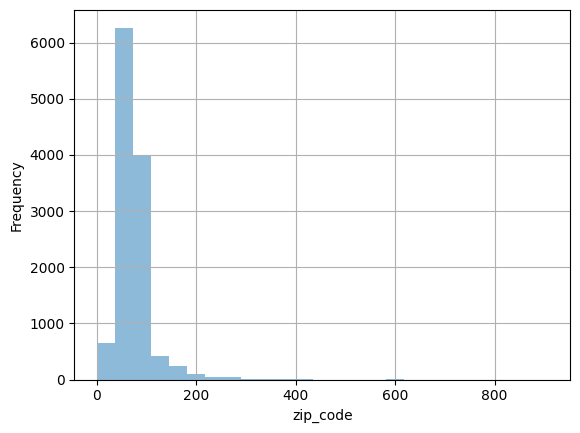

In [259]:
airbnb_data['Zipcode'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.yscale("log")
plt.xlabel('zip_code')

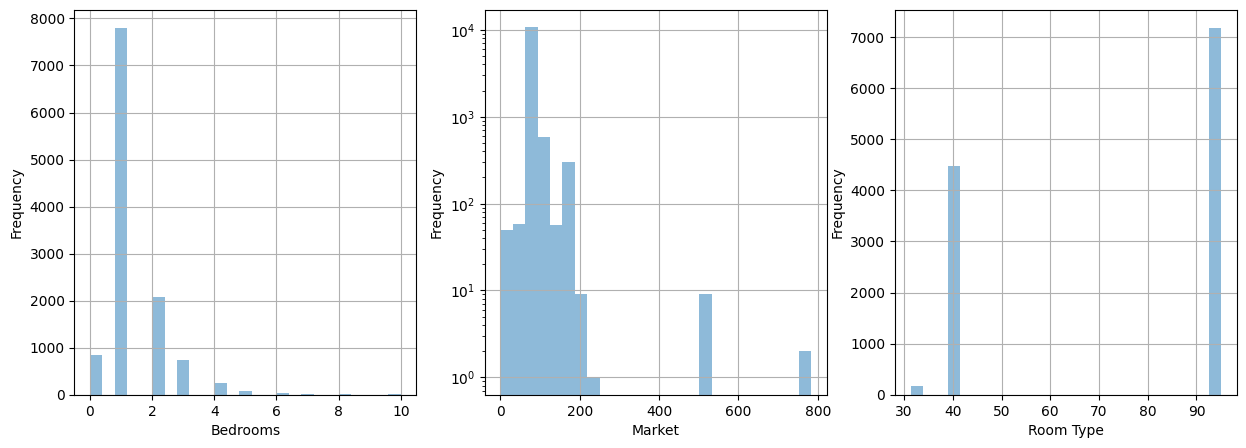

In [260]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_data['Market'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Market')

plt.subplot(1,3,3)
airbnb_data['Room Type'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Room Type')

plt.show()

In [261]:
airbnb_data.corr() # matriz de correlación

,Price,Experiences Offered,Host ID,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Market,Country Code,...,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
Price,1.000000,0.042915,-0.052158,0.008489,0.009686,0.229599,0.229599,0.481591,0.351088,0.244383,...,0.000851,-0.055834,-0.084911,-0.085789,-0.082194,-0.096581,-0.095297,-0.082433,-0.092164,0.166795
Experiences Offered,0.042915,1.000000,-0.027637,0.013538,0.008132,-0.010079,-0.010079,0.054714,0.024825,0.029924,...,-0.001822,0.010040,0.019364,0.019016,0.018472,0.020352,0.021331,0.016914,0.015794,0.020203
Host ID,-0.052158,-0.027637,1.000000,-0.091215,-0.093552,-0.072249,-0.072249,-0.110919,-0.123945,-0.062518,...,-0.009020,-0.244186,-0.201539,-0.200143,-0.199669,-0.200904,-0.202869,-0.210048,-0.200590,-0.123294
Host Response Time,0.008489,0.013538,-0.091215,1.000000,0.906796,0.108882,0.108882,0.038212,0.006403,-0.031418,...,0.002139,0.192700,0.347662,0.347839,0.354690,0.349010,0.350194,0.351639,0.345090,0.162507
Host Response Rate,0.009686,0.008132,-0.093552,0.906796,1.000000,0.096007,0.096007,0.040877,0.008458,-0.030801,...,0.002547,0.229925,0.376227,0.375786,0.383809,0.377952,0.377820,0.378594,0.374932,0.164853
Host Listings Count,0.229599,-0.010079,-0.072249,0.108882,0.096007,1.000000,1.000000,0.255274,0.244494,-0.030100,...,0.005003,-0.117654,-0.152909,-0.148282,-0.140430,-0.164288,-0.159596,-0.139448,-0.156122,0.301447
Host Total Listings Count,0.229599,-0.010079,-0.072249,0.108882,0.096007,1.000000,1.000000,0.255274,0.244494,-0.030100,...,0.005003,-0.117654,-0.152909,-0.148282,-0.140430,-0.164288,-0.159596,-0.139448,-0.156122,0.301447
Zipcode,0.481591,0.054714,-0.110919,0.038212,0.040877,0.255274,0.255274,1.000000,0.536417,0.293668,...,0.002509,-0.000831,-0.029525,-0.029797,-0.027632,-0.033650,-0.034231,-0.014447,-0.031559,0.190474
Market,0.351088,0.024825,-0.123945,0.006403,0.008458,0.244494,0.244494,0.536417,1.000000,0.639588,...,-0.003092,-0.036625,-0.036423,-0.036596,-0.038405,-0.040955,-0.040631,-0.044196,-0.039419,0.174450
Country Code,0.244383,0.029924,-0.062518,-0.031418,-0.030801,-0.030100,-0.030100,0.293668,0.639588,1.000000,...,-0.004949,0.014950,0.010101,0.008618,0.006181,0.008419,0.007851,0.006159,0.009387,0.014977


In [213]:
#pip install seaborn

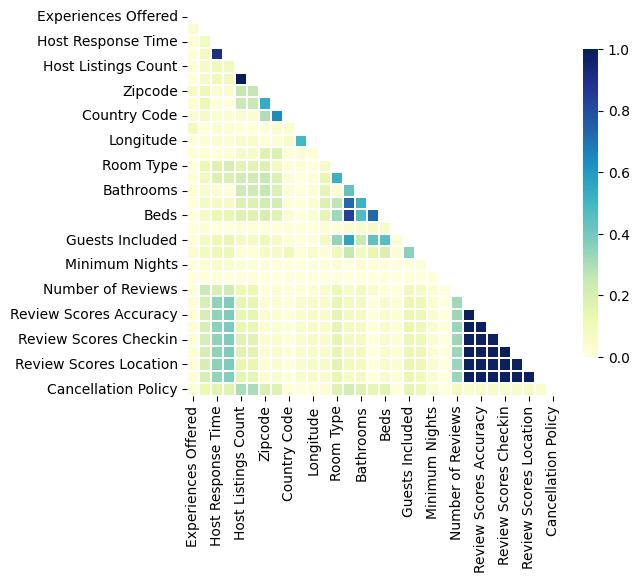

In [262]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [263]:
# Calcular correlaciones de las columnas numéricas con 'Price'
correlations = airbnb_data.corr()['Price'].sort_values(ascending=False)

# Mostrar las variables más relevantes
print(correlations)


Price                          1.000000
Accommodates                   0.528380
Bedrooms                       0.492037
Zipcode                        0.481591
Beds                           0.437125
Bathrooms                      0.375451
Room Type                      0.372118
Market                         0.351088
Guests Included                0.296850
Country Code                   0.244383
Host Total Listings Count      0.229599
Host Listings Count            0.229599
Cancellation Policy            0.166795
Property Type                  0.165018
Extra People                   0.104672
Experiences Offered            0.042915
Bed Type                       0.037879
Minimum Nights                 0.029632
Host Response Rate             0.009686
Host Response Time             0.008489
Longitude                      0.004976
Maximum Nights                 0.000851
Latitude                      -0.013221
Host ID                       -0.052158
Number of Reviews             -0.055834


In [13]:
# Despues de ver las correlaciones, eliminamos otras columnas innecesarias
airbnb_data = airbnb_data.drop(['Host Total Listings Count', 'Review Scores Rating', 'Review Scores Value', 'Review Scores Communication','Review Scores Cleanliness', 'Review Scores Location', 'Review Scores Accuracy'], axis=1)

#airbnb_data = airbnb_data.drop(['Review Scores Accuracy'], axis=1)  # Para poder ir eliminando una a una y añadirla a la linea anterior

Volvemos a hacer la matrix de correlacion habiendo eliminado las variables innecesarias

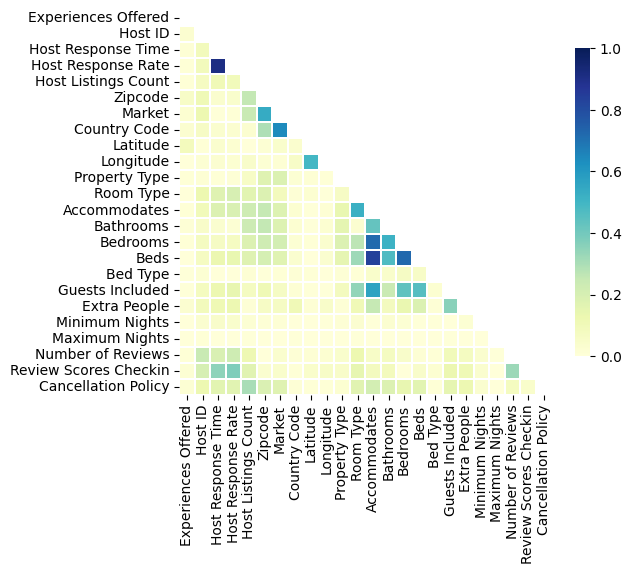

In [265]:
# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

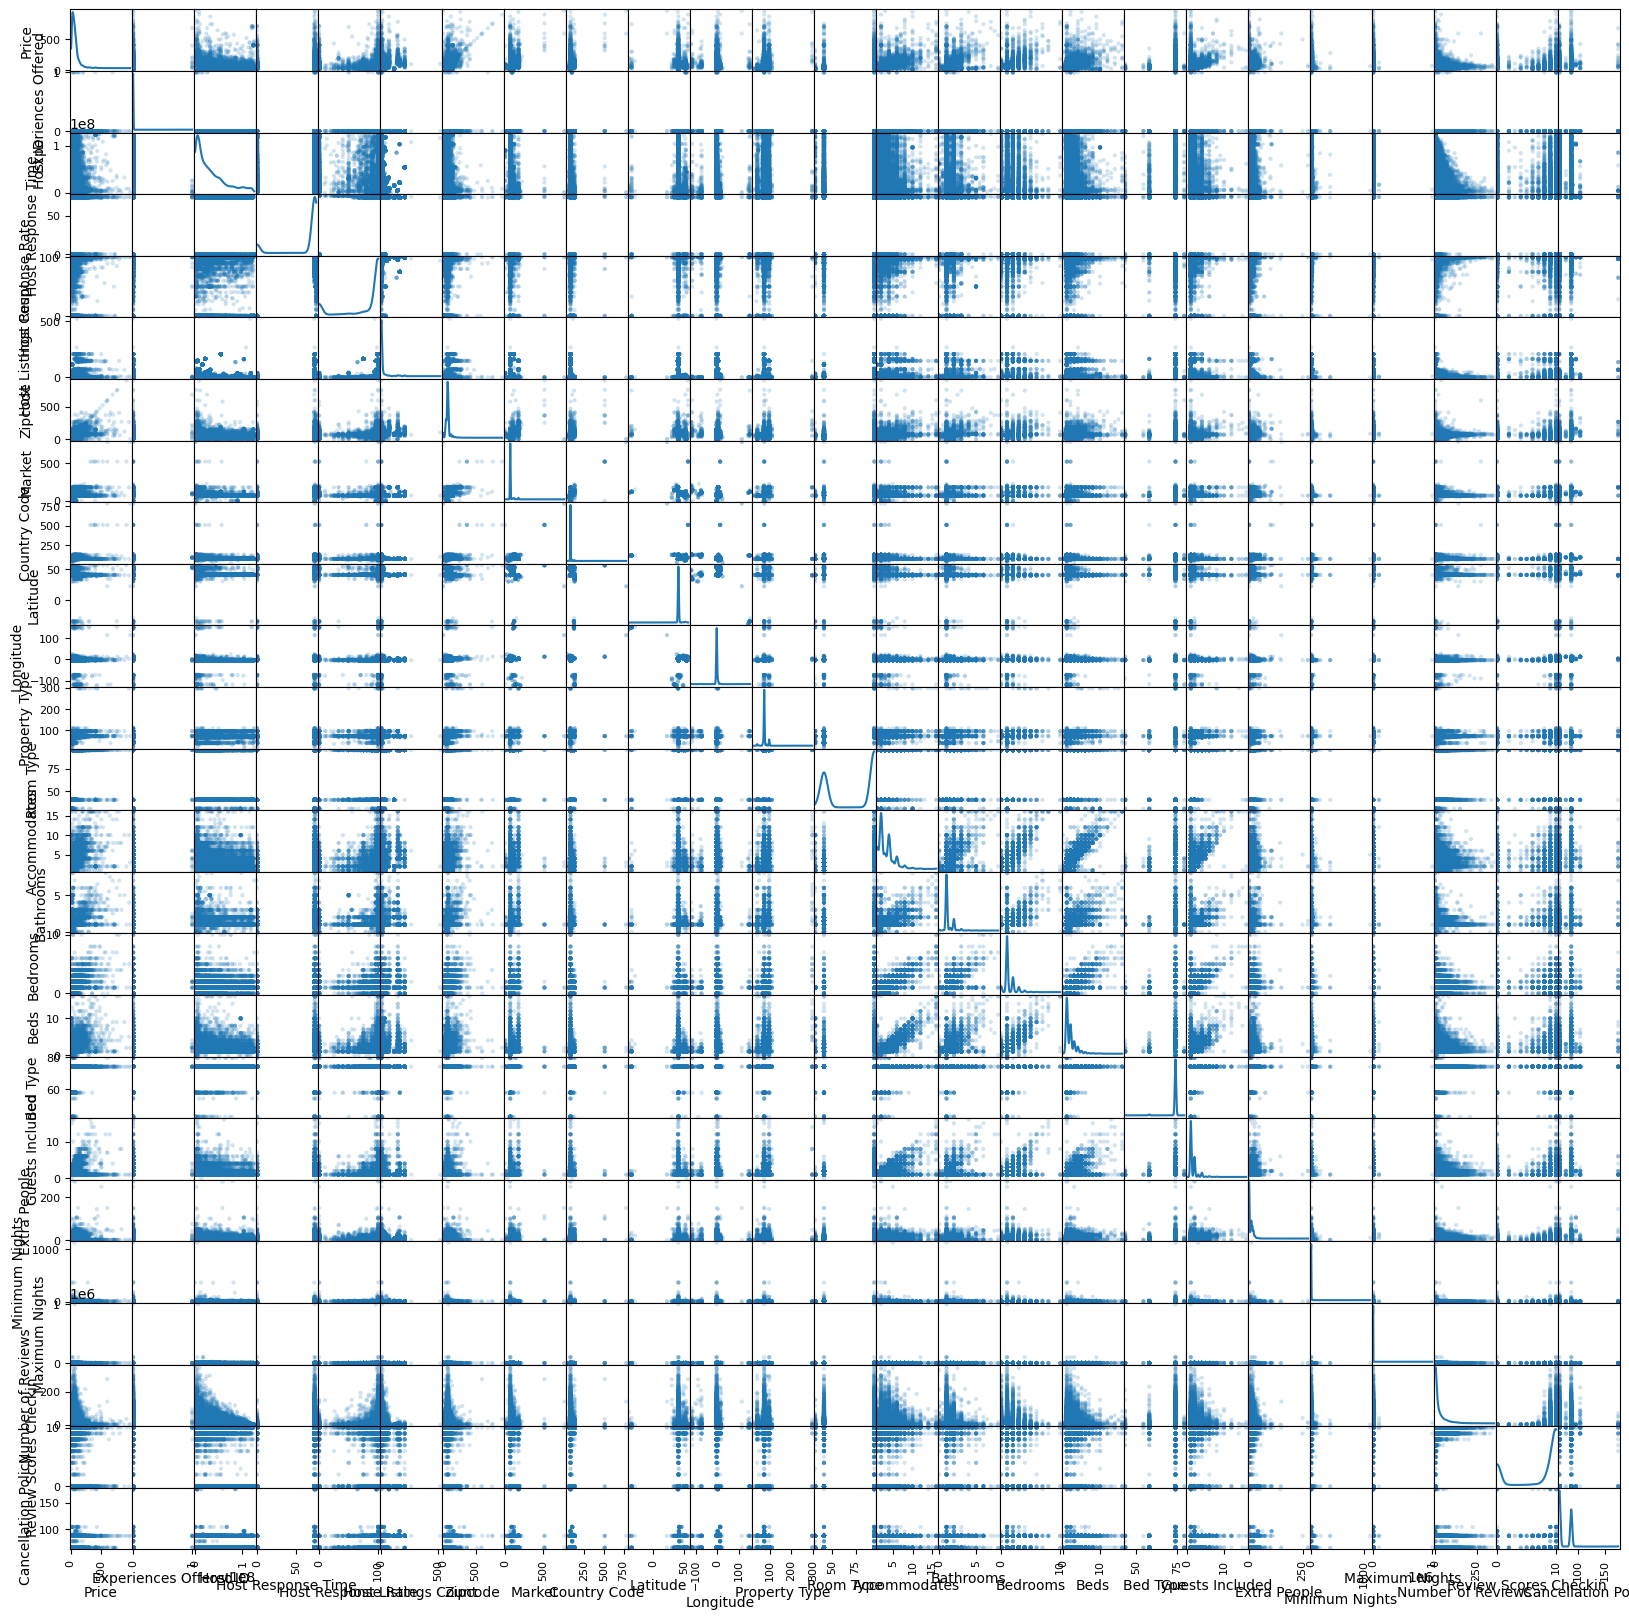

In [266]:
pd.plotting.scatter_matrix(airbnb_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [282]:
airbnb_data['Accommodates'].value_counts()

Accommodates
2     4227
4     2610
1     1634
3     1140
6      940
5      551
8      267
7      174
10      97
9       59
12      42
16      30
11      19
14      12
15       4
13       3
Name: count, dtype: int64

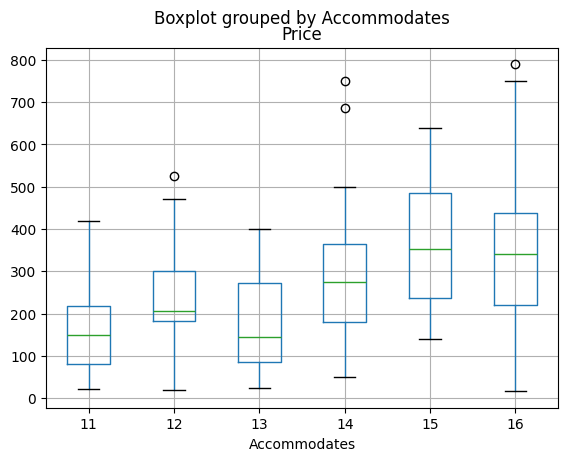

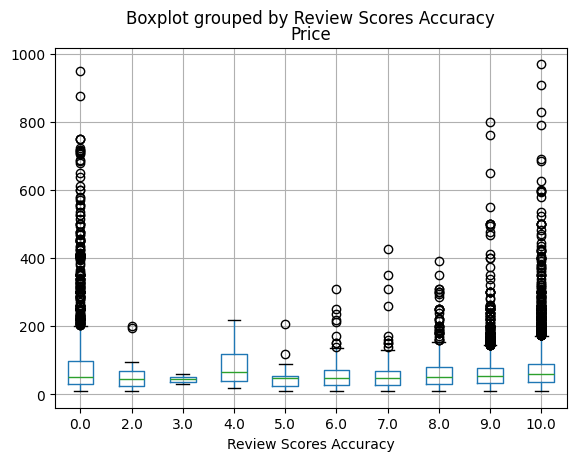

In [287]:
airbnb_data[airbnb_data['Accommodates'] > 10].boxplot(by='Accommodates', column='Price')

airbnb_data.boxplot(by='Review Scores Accuracy', column='Price')

plt.show()

In [24]:
airbnb_data["Extra People"].value_counts().sort_index()

Extra People
0      6083
5       456
6        65
7        90
8       154
       ... 
178       1
250       2
274       1
276       1
500       1
Name: count, Length: 63, dtype: int64

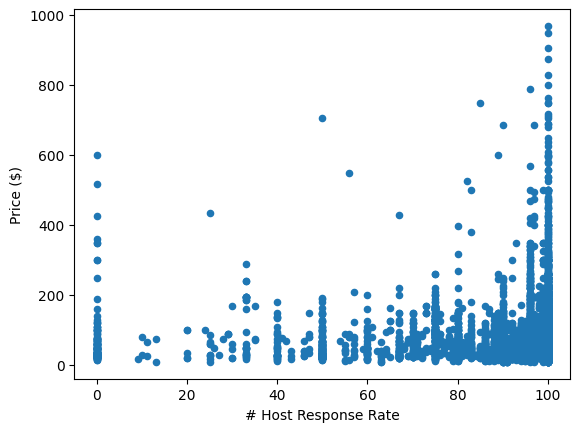

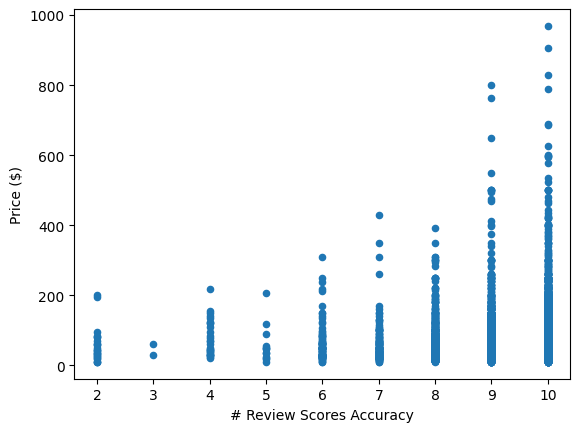

In [25]:
airbnb_data.plot(kind = 'scatter',x='Host Response Rate',y = 'Price')
plt.xlabel('# Host Response Rate')
plt.ylabel('Price ($)')
plt.show()

airbnb_data.plot(kind = 'scatter',x='Review Scores Accuracy',y = 'Price')
plt.xlabel('# Review Scores Accuracy')
plt.ylabel('Price ($)')
plt.show()


Recopilacion de todas las transformaciones en una unica celda:

In [269]:
# Carga de datos
airbnb_data = pd.read_csv('./data/airbnb-listings_train.csv', sep=';', decimal='.')

# Mover la columna 'Price' a la primera posición
columns = ['Price'] + [col for col in airbnb_data.columns if col != 'Price']
airbnb_data = airbnb_data[columns]

# Eliminamos las columnas innecesarias
airbnb_data = airbnb_data.drop(['ID','Weekly Price', 'Monthly Price','Cleaning Fee', 'Security Deposit','License','Reviews per Month', 'Last Scraped','Listing Url','Scrape ID','Host Picture Url','Host Location','Name','Summary','Space','Description','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Name','Host Since','Host About','Host Acceptance Rate','Host Thumbnail Url','Host Neighbourhood','Host Verifications','Neighborhood Overview','Street','Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','City','State','Smart Location','Country','Amenities','Square Feet','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped','First Review','Last Review','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)
# Despues de ver las correlaciones, eliminamos otras columnas innecesarias
airbnb_data = airbnb_data.drop(['Host Total Listings Count', 'Review Scores Rating', 'Review Scores Value', 'Review Scores Communication'], axis=1)

# Sustituir NaN por 0 en la columna 'Price'
airbnb_data['Price'] = airbnb_data['Price'].fillna(0)

# Reemplazar 'none' por 0 y otros valores por 1 en la columna 'Experiences Offered'
airbnb_data['Experiences Offered'] = (airbnb_data['Experiences Offered'] != 'none').astype(int)

# Eliminar filas donde 'Price' sea igual a 0
airbnb_data = airbnb_data[airbnb_data['Price'] != 0]

categorical_columns = airbnb_data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_columns)

# Diccionario para guardar los mapas de correspondencia
encoding_maps = {}

# Aplicar Target Encoding
for col in categorical_columns:
    # Calcular la media de la variable objetivo para cada categoría
    target_mean = airbnb_data.groupby(col)['Price'].mean()
    # Reemplazar las categorías por la media
    airbnb_data[col] = airbnb_data[col].map(target_mean)
    # Guardar el mapa de correspondencia
    encoding_maps[col] = target_mean.to_dict()

# Guardar los mapas de correspondencia en un archivo JSON
with open('encoding_maps.json', 'w') as f:
    json.dump(encoding_maps, f)

# Sustituir todos los NaN en el DataFrame por 0
airbnb_data.fillna(0, inplace=True)

Variables categóricas: Index(['Host Response Time', 'Zipcode', 'Market', 'Country Code',
       'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')


Aplicar a test:

In [270]:
# Carga de datos
airbnb_data_test = pd.read_csv('./data/airbnb-listings_test.csv', sep=';', decimal='.')

# Mover la columna 'Price' a la primera posición
columns = ['Price'] + [col for col in airbnb_data_test.columns if col != 'Price']
airbnb_data_test = airbnb_data_test[columns]

# Eliminamos las columnas innecesarias
airbnb_data_test = airbnb_data_test.drop(['ID','Weekly Price', 'Monthly Price','Cleaning Fee', 'Security Deposit','License','Reviews per Month', 'Last Scraped','Listing Url','Scrape ID','Host Picture Url','Host Location','Name','Summary','Space','Description','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Name','Host Since','Host About','Host Acceptance Rate','Host Thumbnail Url','Host Neighbourhood','Host Verifications','Neighborhood Overview','Street','Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','City','State','Smart Location','Country','Amenities','Square Feet','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped','First Review','Last Review','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)
# Despues de ver las correlaciones, eliminamos otras columnas innecesarias
airbnb_data_test = airbnb_data_test.drop(['Host Total Listings Count', 'Review Scores Rating', 'Review Scores Value', 'Review Scores Communication'], axis=1)

# Sustituir NaN por 0 en la columna 'Price'
airbnb_data_test['Price'] = airbnb_data_test['Price'].fillna(0)

# Reemplazar 'none' por 0 y otros valores por 1 en la columna 'Experiences Offered'
airbnb_data_test['Experiences Offered'] = (airbnb_data_test['Experiences Offered'] != 'none').astype(int)

# Eliminar filas donde 'Price' sea igual a 0
airbnb_data_test = airbnb_data_test[airbnb_data_test['Price'] != 0]

categorical_columns = airbnb_data_test.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_columns)

# Diccionario para guardar los mapas de correspondencia
encoding_maps_test = {}

# Aplicar Target Encoding
for col in categorical_columns:
    # Calcular la media de la variable objetivo para cada categoría
    target_mean = airbnb_data_test.groupby(col)['Price'].mean()
    # Reemplazar las categorías por la media
    airbnb_data_test[col] = airbnb_data_test[col].map(target_mean)
    # Guardar el mapa de correspondencia
    encoding_maps_test[col] = target_mean.to_dict()

# Guardar los mapas de correspondencia en un archivo JSON
with open('encoding_maps_test.json', 'w') as f:
    json.dump(encoding_maps_test, f)

# Sustituir todos los NaN en el DataFrame por 0
airbnb_data_test.fillna(0, inplace=True)

Variables categóricas: Index(['Host Response Time', 'Zipcode', 'Market', 'Country Code',
       'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'],
      dtype='object')


Ahora podemos preparar los datos para sklearn:

In [271]:
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

podemos normalizar, pero con los datos de train!

In [272]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [273]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11809, 27)
Datos test:  (2954, 27)


Cross validation para buscar los parametros optimos.

Fitting 6 folds for each of 20 candidates, totalling 120 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.3792

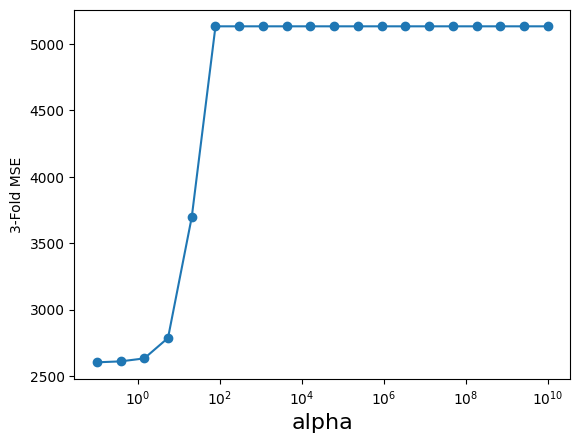

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 6, return_train_score =True, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [275]:
grid.best_params_['alpha']

np.float64(0.1)

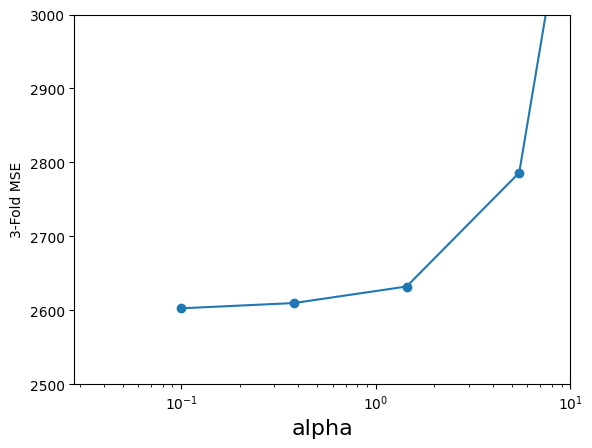

In [276]:
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.xlim(0, 10)
plt.ylim(2500, 3000)
plt.show()

In [277]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.55e+03
MSE Modelo Lasso (test) : 2.39e+03
RMSE Modelo Lasso (train): 50.5
RMSE Modelo Lasso (test) : 48.9
Experiences Offered 1.4098695942291708
Host ID 1.4644787540459834
Host Response Time -1.5905038673668435
Host Response Rate -1.802454851209234
Host Listings Count 1.670761176830352
Zipcode 20.246343039414196
Market -4.426628336758567
Country Code 15.508734667335403
Latitude 0.0
Longitude 0.0
Property Type 1.5828816930259484
Room Type 13.236023383394253
Accommodates 17.152498961567414
Bathrooms 8.440275741565365
Bedrooms 13.69385441274335
Beds -3.7113669770496753
Bed Type 0.6108635602845888
Guests Included 0.7429260278836048
Extra People -1.5927742253112898
Minimum Nights 0.294487884076002
Maximum Nights -0.0
Number of Reviews -2.2647649128740164
Review Scores Accuracy 0.0
Review Scores Cleanliness 5.735628576381214
Review Scores Checkin -11.750847394217313
Review Scores Location -0.0
Cancellation Policy 0.3696812494064567


In [278]:
np.sqrt(-grid.cv_results_["mean_train_score"]),np.sqrt(-grid.cv_results_["mean_test_score"])

(array([50.48698669, 50.57661376, 50.87390104, 52.20911132, 60.60660798,
        71.62109603, 71.62109603, 71.62109603, 71.62109603, 71.62109603,
        71.62109603, 71.62109603, 71.62109603, 71.62109603, 71.62109603,
        71.62109603, 71.62109603, 71.62109603, 71.62109603, 71.62109603]),
 array([51.01533439, 51.08516516, 51.30346337, 52.78266707, 60.78792215,
        71.63034428, 71.63034428, 71.63034428, 71.63034428, 71.63034428,
        71.63034428, 71.63034428, 71.63034428, 71.63034428, 71.63034428,
        71.63034428, 71.63034428, 71.63034428, 71.63034428, 71.63034428]))

Los errores en el conjunto de entrenamiento y prueba son similares (2.55e+03 vs. 2.39e+03), lo que indica que el modelo generaliza bien y no está sobreajustado ni subajustado.
Segun este modelo, Zipcode, Accommodates, y Room Type son las características más influyentes en la predicción del precio.
Variables como Review Scores Checkin tienen un impacto negativo significativo, mostrando que afectan negativamente al precio si los puntajes son bajos.
El modelo generaliza bien, ya que los errores en entrenamiento y prueba son similares. Los valores de RMSE son razonables, indicando que el modelo tiene un buen ajuste.

Probamos los datos con un modelo basado en arboles para ver la importancia de cada una de las caracteristicas.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = airbnb_data.drop(columns=['Price'])
y = airbnb_data['Price']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Importancia de las características
importances = model.feature_importances_

# Mostrar las importancias con los nombres de las columnas
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                  Feature  Importance
14               Bedrooms    0.185139
13              Bathrooms    0.153472
1                 Host ID    0.114784
5                 Zipcode    0.111517
8                Latitude    0.074427
11              Room Type    0.065449
9               Longitude    0.047008
12           Accommodates    0.040780
19         Minimum Nights    0.024940
7            Country Code    0.023462
4     Host Listings Count    0.020741
21      Number of Reviews    0.018905
6                  Market    0.017848
18           Extra People    0.017778
15                   Beds    0.015036
20         Maximum Nights    0.011675
3      Host Response Rate    0.011447
10          Property Type    0.009675
23    Cancellation Policy    0.009635
2      Host Response Time    0.009326
17        Guests Included    0.009311
22  Review Scores Checkin    0.007224
16               Bed Type    0.000351
0     Experiences Offered    0.000071


Segun los resultados del random forest, La variable Bedrooms es la característica más relevante, representando aproximadamente el 18.5% de la importancia total del modelo. Bathrooms también tiene alta relevancia, con un peso del 15.3%, junto con Bedrooms, estas dos características dominan las predicciones.